In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Import dataset
df = pd.read_csv('Datasets/Auditions.db.comp.csv', encoding='latin-1', low_memory=False).dropna(subset=["ID"])
df.head()

,Name,n_poste,Level,Section,Role,status,year,institutions,ID,X,X.1,Id.author.no
0,Philippe DESSUS,193,PR,NaN,NaN,interne,2017,NaN,80526470,NaN,NaN,NaN
1,A Belhadjin,20,NaN,NaN,NaN,interne,2020,CY Cergy Paris Université,11317022X,NaN,NaN,NaN
2,A Bretegnier,62,NaN,NaN,NaN,externe,2020,NaN,70549923,NaN,NaN,NaN
3,A evin,4279,NaN,NaN,NaN,externe,2020,NaN,159017920,NaN,NaN,NaN
4,A Gombert,4647,NaN,NaN,NaN,externe,2020,NaN,6993696X,NaN,NaN,NaN


In [41]:
df_int_2017 = df[np.logical_and(df["year"] == 2017, df["status"] == "interne")]
df_ext_2017 = df[np.logical_and(df["year"] == 2017, df["status"] == "externe")]
df_int_2018 = df[np.logical_and(df["year"] == 2018, df["status"] == "interne")]
df_ext_2018 = df[np.logical_and(df["year"] == 2018, df["status"] == "externe")]
df_int_2019 = df[np.logical_and(df["year"] == 2019, df["status"] == "interne")]
df_ext_2019 = df[np.logical_and(df["year"] == 2019, df["status"] == "externe")]
df_int_2020 = df[np.logical_and(df["year"] == 2020, df["status"] == "interne")]
df_ext_2020 = df[np.logical_and(df["year"] == 2020, df["status"] == "externe")]

In [47]:
import networkx as nx
from itertools import combinations, chain
from collections import Counter
def Graph(df):
    L = df.groupby("n_poste")["ID"].agg(list).values.tolist()
    # get all edges from each ID 
    L2_nested = [list(combinations(l, 2)) for l in L]
    # flatten the nested list to a list
    L2 = chain.from_iterable(L2_nested)
    # Build a counter -> amount of entries = edge weight
    c = Counter(tuple(sorted(t)) for t in L2).items()
    # flatten the dictionary to tuples (source, dest, weight)
    weighted_edges = [(*edge, weight) for edge, weight in c]
    # Create networkx graph and add weighted edges
    G = nx.Graph()
    G.add_weighted_edges_from(weighted_edges)
    # draw graph
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=False, node_size=50)
    return G

import community as community_louvain
import matplotlib.cm as cm
def community_detection(G):
    #first compute the best partition
    partition = community_louvain.best_partition(G)

    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

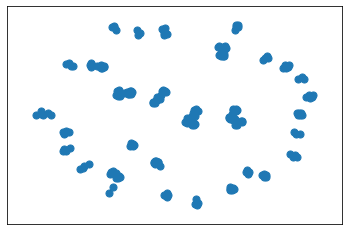

In [48]:
G = Graph(df_int_2017)

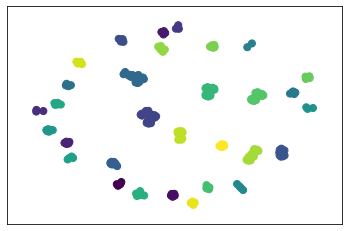

In [49]:
community_detection(G)

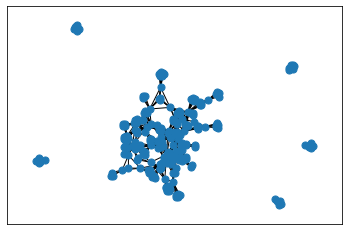

In [37]:
G = Graph(df_ext_2017)

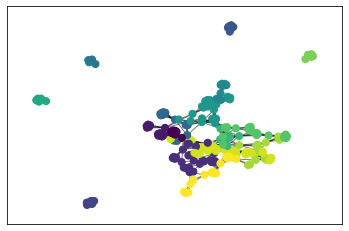

In [38]:
community_detection(G)